<a href="https://colab.research.google.com/github/aribatabassum/project_ybi/blob/main/Hospital_Patient_Risk_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PROJECT TITLE: Hospital Patient Risk Analysis

OBJECTIVES:
1. Examine hospital patient records to determine risk categories (such as low, medium or high risk), visualize trends, and recommend patient management strategies applying ML & GenAI.
2. Utilize graphs to identify trends within the patient population.
3. Classify patients into distinct risk groups according to their age, BMI, and blood pressure.

TOOLS/LIBRARIES USED:
1. Google Colab
2. Libraries used: Pandas, numpy, Matplotlib, scikit-learn
3. Example codes from the internship program
4. Microsoft Copilot




In [ ]:
import pandas as pd
import numpy as np

# Set number of records
num_patients = 200

# Generate synthetic data
np.random.seed(42)
df = pd.DataFrame({
    'PatientID': range(1, num_patients + 1),
    'Age': np.random.randint(20, 80, size=num_patients),
    'BMI': np.round(np.random.uniform(18.0, 38.0, size=num_patients), 1),
    'BloodPressure': np.random.randint(90, 180, size=num_patients),
    'Diabetes': np.random.choice(['Yes', 'No'], size=num_patients, p=[0.3, 0.7]),
    'Smoker': np.random.choice(['Yes', 'No'], size=num_patients, p=[0.25, 0.75])
})

df


,PatientID,Age,BMI,BloodPressure,Diabetes,Smoker
0,1,58,30.0,108,Yes,No
1,2,71,31.9,147,Yes,No
2,3,48,35.6,144,No,No
3,4,34,30.5,179,No,No
4,5,62,23.9,179,No,Yes
...,...,...,...,...,...,...
195,196,62,20.7,156,No,Yes
196,197,48,37.4,134,Yes,Yes
197,198,55,32.3,102,Yes,Yes
198,199,32,18.8,147,No,No


In [ ]:
df.to_csv('patient_data.csv', index=False)
from google.colab import files
files.download('patient_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#exploring patient data

import pandas as pd
import matplotlib.pyplot as plt

# Load CSV file
df = pd.read_csv('patient_data.csv')

# Basic info
print(df.head())         # First few rows
print(df.shape)          # Dimensions: (rows, columns)
print(df.describe())     # Summary statistics
print(df.info())         # Data overview, Data types + null checks


   PatientID  Age   BMI  BloodPressure Diabetes Smoker
0          1   58  30.0            108      Yes     No
1          2   71  31.9            147      Yes     No
2          3   48  35.6            144       No     No
3          4   34  30.5            179       No     No
4          5   62  23.9            179       No    Yes
(200, 6)
        PatientID        Age         BMI  BloodPressure
count  200.000000  200.00000  200.000000     200.000000
mean   100.500000   49.32500   27.976000     133.500000
std     57.879185   17.39027    5.676127      26.645259
min      1.000000   20.00000   18.000000      90.000000
25%     50.750000   34.00000   23.375000     108.750000
50%    100.500000   48.50000   27.550000     131.500000
75%    150.250000   63.00000   32.225000     156.000000
max    200.000000   79.00000   38.000000     179.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ----

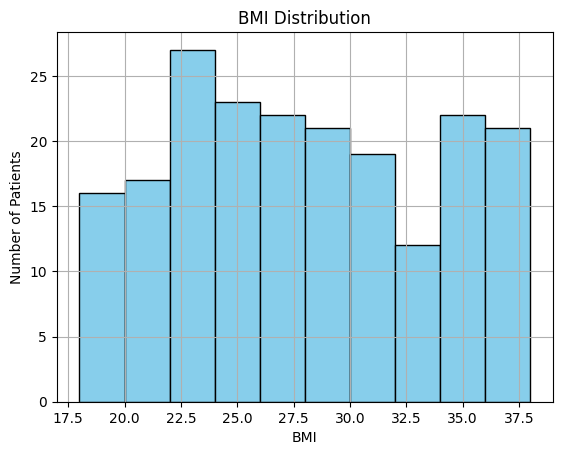

In [ ]:
#BMI distribution
plt.hist(df['BMI'], bins=10, color='skyblue', edgecolor='black')
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Number of Patients')
plt.grid(True)
plt.show()


/tmp/ipython-input-2825412886.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(['AgeGroup', 'Diabetes'])['BloodPressure'].mean().unstack()


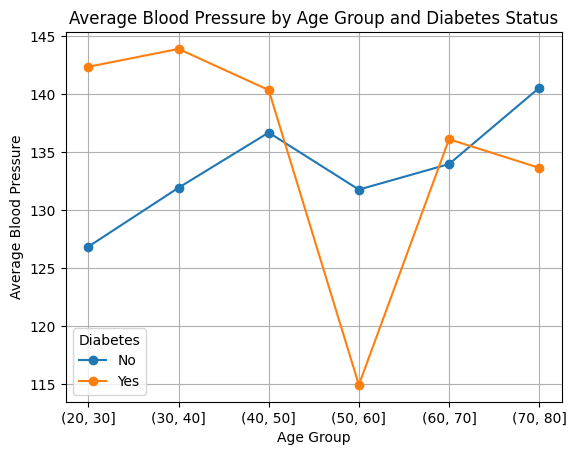

In [ ]:
# Line Plot of Average BP by Age Group
# Create age bins
df['AgeGroup'] = pd.cut(df['Age'], bins=[20,30,40,50,60,70,80])

# Group and calculate mean BP
grouped = df.groupby(['AgeGroup', 'Diabetes'])['BloodPressure'].mean().unstack()

# Line plot
grouped.plot(marker='o')
plt.title('Average Blood Pressure by Age Group and Diabetes Status')
plt.xlabel('Age Group')
plt.ylabel('Average Blood Pressure')
plt.grid(True)
plt.show()


In [ ]:
# Classifying patients into distinct risk groups
# using KMeans Clustering
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

   Age   BMI  BloodPressure  RiskGroup
0   58  30.0            108          0
1   71  31.9            147          0
2   48  35.6            144          0
3   34  30.5            179          2
4   62  23.9            179          1


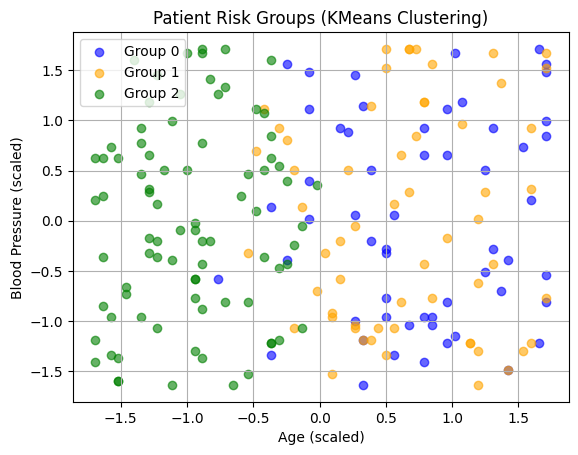

In [ ]:
# Select features
features = df[['Age', 'BMI', 'BloodPressure']]

# Standardize (important for fair clustering)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Initialize and fit KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
df['RiskGroup'] = kmeans.fit_predict(scaled_features)

# See cluster assignments
print(df[['Age', 'BMI', 'BloodPressure', 'RiskGroup']].head())

# Set marker colors for each cluster
colors = ['blue', 'orange', 'green']
labels = ['Group 0', 'Group 1', 'Group 2']

# Plot each cluster
for i in range(3):
    cluster = scaled_features[df['RiskGroup'] == i]
    plt.scatter(cluster[:, 0], cluster[:, 2],
                color=colors[i], label=labels[i], alpha=0.6)

plt.title('Patient Risk Groups (KMeans Clustering)')
plt.xlabel('Age (scaled)')
plt.ylabel('Blood Pressure (scaled)')
plt.legend()
plt.grid(True)
plt.show()

/tmp/ipython-input-1763912216.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bp_by_age_group = df.groupby(['AgeGroup', 'RiskGroup'])['BloodPressure'].mean().unstack()


RiskGroup           0           1           2
AgeGroup                                     
(20, 30]          NaN         NaN  131.060606
(30, 40]   118.000000  125.000000  136.071429
(40, 50]   143.375000  139.666667  134.736842
(50, 60]   129.062500  123.800000         NaN
(60, 70]   129.000000  139.111111         NaN
(70, 80]   138.235294  139.166667         NaN


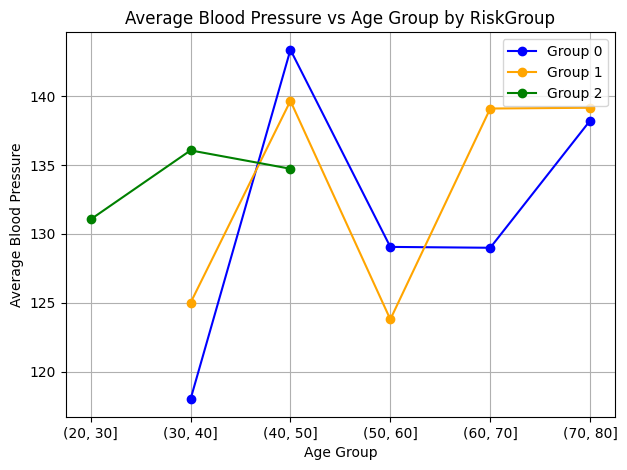

In [ ]:
# *Same as above but Classifying patients into distinct risk groups using line graph

# Define age bins to group ages
age_bins = [20, 30, 40, 50, 60, 70, 80]
df['AgeGroup'] = pd.cut(df['Age'], bins=age_bins)

# Group by AgeGroup and RiskGroup to get mean BloodPressure
bp_by_age_group = df.groupby(['AgeGroup', 'RiskGroup'])['BloodPressure'].mean().unstack()

# Print grouped data (optional, for inspection)
print(bp_by_age_group)

# Prepare X-axis labels
x_labels = bp_by_age_group.index.astype(str)

# Set colors for plotting (extendable if more groups exist)
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink']

# Plot each available RiskGroup dynamically
for idx, group_label in enumerate(bp_by_age_group.columns):
    plt.plot(
        x_labels,
        bp_by_age_group[group_label],
        marker='o',
        label=f'Group {group_label}',
        color=colors[idx % len(colors)]
    )

# Plot settings
plt.title('Average Blood Pressure vs Age Group by RiskGroup')
plt.xlabel('Age Group')
plt.ylabel('Average Blood Pressure')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
